## **Group 10**: *Ashley Kim, Hayes Gill, Alyson Park, Jilli Connolly, Andrea Schwartz-Silvera, Joshua Greene, Ritvik Panuganti*

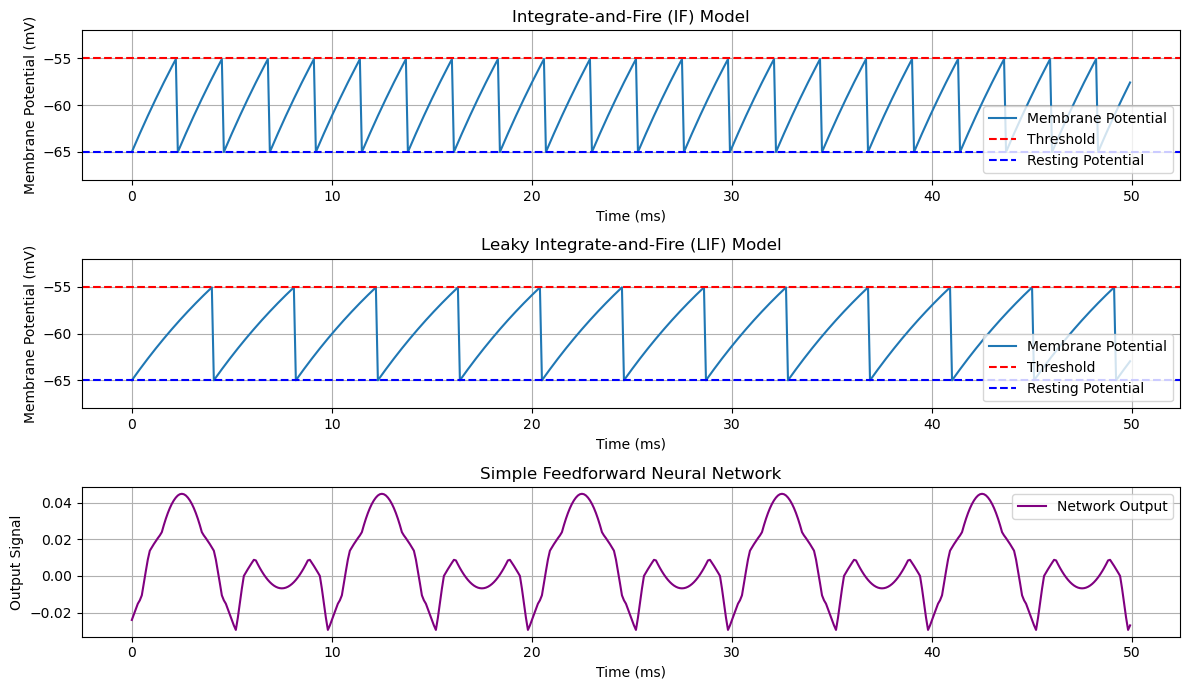

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Parameters
dt = 0.1  # time step (ms)
T = 50  # total simulation time (ms)
time = np.arange(0, T, dt)
R = 10  # membrane resistance (MΩ)
C = 1  # membrane capacitance (μF)
tau_m = R * C  # membrane time constant (ms)
V_rest = -65  # resting potential (mV)
V_th = -55  # threshold potential (mV)
V_reset = -65  # reset potential (mV)
I_ext_if = 5  # Input current for IF model (nA)
I_ext_lif = 3  # Lower input current for LIF model

# === Integrate-and-Fire (IF) Model ===
V_m_if = np.zeros_like(time)
V_m_if[0] = V_rest
spike_times_if = []

for t in range(1, len(time)):
    dV = (-(V_m_if[t - 1] - V_rest) + R * I_ext_if) / tau_m * dt
    V_m_if[t] = V_m_if[t - 1] + dV
    
    if V_m_if[t] >= V_th:
        V_m_if[t] = V_reset
        spike_times_if.append(time[t])

# === Leaky Integrate-and-Fire (LIF) Model ===
V_m_lif = np.zeros_like(time)
V_m_lif[0] = V_rest
spike_times_lif = []

for t in range(1, len(time)):
    dV = ((V_rest - V_m_lif[t - 1]) / tau_m + I_ext_lif / C) * dt
    V_m_lif[t] = V_m_lif[t - 1] + dV
    
    if V_m_lif[t] >= V_th:
        V_m_lif[t] = V_reset
        spike_times_lif.append(time[t])

# === Feedforward Neural Network ===
# Generate input data
X = np.sin(2 * np.pi * time / 10).reshape(-1, 1)  # Example sinusoidal input
Y = np.cos(2 * np.pi * time / 10).reshape(-1, 1)  # Example target output

# Define and train the neural network
nn = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000)
nn.fit(X, Y.ravel())
network_output = nn.predict(X)

# === Plot Results ===
plt.figure(figsize=(12, 7))

# IF Model Plot
plt.subplot(3, 1, 1)
plt.plot(time, V_m_if, label="Membrane Potential")
plt.axhline(V_th, color="red", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="blue", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)
plt.title("Integrate-and-Fire (IF) Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)

# LIF Model Plot
plt.subplot(3, 1, 2)
plt.plot(time, V_m_lif, label="Membrane Potential")
plt.axhline(V_th, color="red", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="blue", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)
plt.title("Leaky Integrate-and-Fire (LIF) Model")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)

# Feedforward Neural Network Output Plot
plt.subplot(3, 1, 3)
plt.plot(time, network_output, label="Network Output", color='purple')
plt.title("Simple Feedforward Neural Network")
plt.xlabel("Time (ms)")
plt.ylabel("Output Signal")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<u> **Question 3** </u>

* The Integrate-and-Fire (I&F) model is the simplest mathematical model for neuron behavior. It represents a neuron as an electrical circuit where incoming signals (currents) accumulate and cause the membrane potential to rise. Once the potential reaches a set threshold, the neuron fires an action potential and then resets. This model is useful for understanding basic neuronal signaling and is computationally efficient, making it ideal for large-scale network simulations. However, it lacks biological realism because it does not account for the fact that neurons naturally lose some charge over time due to ion leakage. Additionally, it treats action potentials as instant spikes without modeling the underlying ionic mechanisms.
* The Leaky Integrate-and-Fire (LIF) model builds upon the I&F model by incorporating a "leak" term, meaning that the neuron’s membrane potential gradually decreases over time unless it receives new input. This makes it more biologically accurate, as real neurons do not hold their charge indefinitely. The LIF model better captures the behavior of neurons in response to input but still does not include important aspects like the role of voltage-gated ion channels in generating action potentials. Since neuronal action potentials are all-or-none, the output response does not scale directly with input, making neuronal behavior inherently non-linear. LIF is a good compromise between simplicity and realism, making it widely used in computational neuroscience.
The Hodgkin-Huxley (HH) model is the most detailed and biologically realistic model of neuronal activity. It describes how action potentials are generated by tracking the movement of sodium (Na⁺) and potassium (K⁺) ions through voltage-gated channels in the neuron’s membrane. Instead of assuming an instant spike at threshold, as in I&F and LIF, the HH model simulates the continuous changes in ion flow that lead to the rise and fall of membrane voltage. This makes it extremely accurate but also computationally demanding, as it requires solving complex differential equations. A limitation of the HH model is that it assumes uniform properties across the entire neuron, whereas real neurons have varying channel densities in different regions.
* From an information theory perspective, the HH model contains the most bits because it tracks multiple continuous variables over time, storing detailed information about voltage, currents, and channel states. The LIF model has fewer bits since it simplifies neuronal behavior by introducing only a leakage factor without modeling specific ion channels. The I&F model has the least information because its output is purely binary (fire or not fire), making it the most concise but also the least detailed. In summary, the I&F model prioritizes efficiency, the LIF model balances efficiency with biological accuracy, and the HH model sacrifices efficiency for a comprehensive and realistic depiction of neuronal activity.


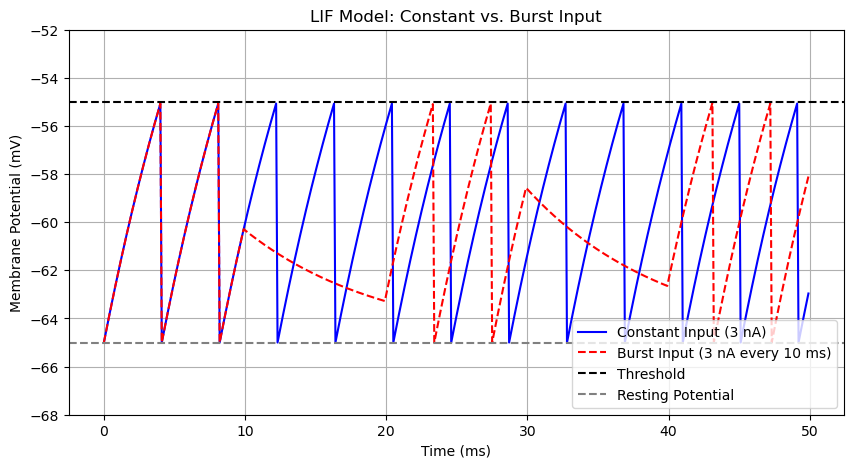

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
T = 50  # total simulation time (ms)
time = np.arange(0, T, dt)
R = 10  # membrane resistance (MΩ)
C = 1  # membrane capacitance (μF)
tau_m = R * C  # membrane time constant (ms)
V_rest = -65  # resting potential (mV)
V_th = -55  # threshold potential (mV)
V_reset = -65  # reset potential (mV)

# Input current configurations
I_const = np.full_like(time, 3)  # Constant input (3 nA)
I_burst = np.where((time // 10) % 2 == 0, 3, 0)  # Alternating 3 nA for 10 ms, then 0 nA for 10 ms

# Function to simulate LIF model
def simulate_lif(I_ext):
    V_m = np.zeros_like(time)
    V_m[0] = V_rest
    for t in range(1, len(time)):
        dV = ((V_rest - V_m[t - 1]) / tau_m + I_ext[t] / C) * dt  # LIF equation
        V_m[t] = V_m[t - 1] + dV
        if V_m[t] >= V_th:
            V_m[t] = V_reset  # Reset potential after spike
            spike_times_lif.append(time[t])
    return V_m
    

# Simulate both cases
V_m_const = simulate_lif(I_const)
V_m_burst = simulate_lif(I_burst)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V_m_const, label="Constant Input (3 nA)", color='blue')
plt.plot(time, V_m_burst, label="Burst Input (3 nA every 10 ms)", color='red', linestyle="dashed")
plt.axhline(V_th, color="black", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="gray", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Model: Constant vs. Burst Input")
plt.legend()
plt.grid(True)
plt.show()

<u> **Question 4** </u>
* What changes did you make to the input?
    * The I_ext_LIF was changed to: "I_const = np.full_like(time, 3)" and "I_burst = np.where((time // 10) % 2 == 0, 3, 0)" to provide two different sources of input.
    * In order to initialize the membrane potential for the new model at resting potential the following code was added:
      "def simulate_lif(I_ext):
        V_m = np.zeros_like(time)
        V_m[0] = V_rest"
    * The plot results are also different as the requirements for the plot were varied.
      "# Plot results
        plt.figure(figsize=(10, 5))
        plt.plot(time, V_m_const, label="Constant Input (3 nA)", color='blue')
        plt.plot(time, V_m_burst, label="Burst Input (3 nA every 10 ms)", color='red', linestyle="dashed")
        plt.axhline(V_th, color="black", linestyle="--", label="Threshold")
        plt.axhline(V_rest, color="gray", linestyle="--", label="Resting Potential")
        plt.ylim(-68, -52)
        plt.xlabel("Time (ms)")
        plt.ylabel("Membrane Potential (mV)")
        plt.title("LIF Model: Constant vs. Burst Input")
        plt.legend()
        plt.grid(True)
        plt.show()"

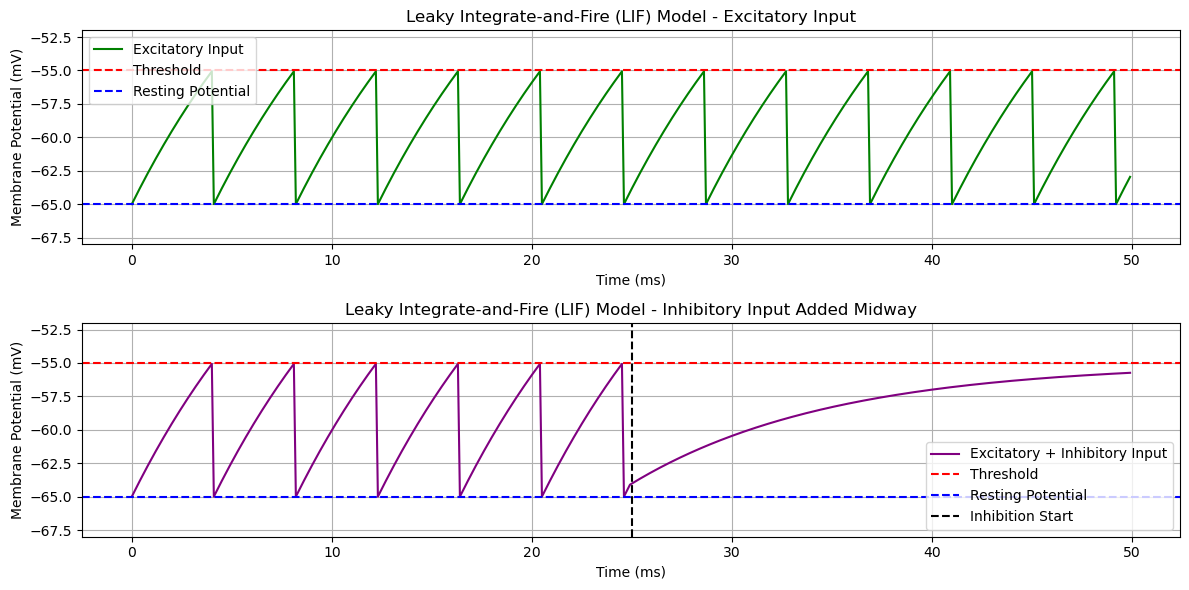

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # time step (ms)
T = 50  # total simulation time (ms)
time = np.arange(0, T, dt)
R = 10  # membrane resistance (MΩ)
C = 1  # membrane capacitance (μF)
tau_m = R * C  # membrane time constant (ms)
V_rest = -65  # resting potential (mV)
V_th = -55  # threshold potential (mV)
V_reset = -65  # reset potential (mV)
I_ext_lif = 3  # Lower input current for LIF model
I_inh_lif = -2  # Inhibitory input current for LIF model

# Time index to add inhibition
inhibition_start = len(time) // 2
inhibition_time = time[inhibition_start]

# === Leaky Integrate-and-Fire (LIF) Model (Excitatory) ===
V_m_lif = np.zeros_like(time)
V_m_lif[0] = V_rest
spike_times_lif = []

for t in range(1, len(time)):
    dV = ((V_rest - V_m_lif[t - 1]) / tau_m + I_ext_lif / C) * dt
    V_m_lif[t] = V_m_lif[t - 1] + dV
    
    if V_m_lif[t] >= V_th:
        V_m_lif[t] = V_reset
        spike_times_lif.append(time[t])

# === Leaky Integrate-and-Fire (LIF) Model with Inhibition ===
V_m_lif_inh = np.zeros_like(time)
V_m_lif_inh[0] = V_rest
spike_times_lif_inh = []

for t in range(1, len(time)):
    if t < inhibition_start:
        dV = ((V_rest - V_m_lif_inh[t - 1]) / tau_m + I_ext_lif / C) * dt
    else:
        dV = ((V_rest - V_m_lif_inh[t - 1]) / tau_m + (I_ext_lif + I_inh_lif) / C) * dt
    
    V_m_lif_inh[t] = V_m_lif_inh[t - 1] + dV
    
    if V_m_lif_inh[t] >= V_th:
        V_m_lif_inh[t] = V_reset
        spike_times_lif_inh.append(time[t])

# === Plot Results ===
plt.figure(figsize=(12, 6))

# LIF Model Plot (Excitatory)
plt.subplot(2, 1, 1)
plt.plot(time, V_m_lif, label="Excitatory Input", color='green')
plt.axhline(V_th, color="red", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="blue", linestyle="--", label="Resting Potential")
plt.ylim(-68, -52)
plt.title("Leaky Integrate-and-Fire (LIF) Model - Excitatory Input")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)

# LIF Model Plot (Inhibitory)
plt.subplot(2, 1, 2)
plt.plot(time, V_m_lif_inh, label="Excitatory + Inhibitory Input", color='purple')
plt.axhline(V_th, color="red", linestyle="--", label="Threshold")
plt.axhline(V_rest, color="blue", linestyle="--", label="Resting Potential")
plt.axvline(inhibition_time, color='black', linestyle='--', label='Inhibition Start')
plt.ylim(-68, -52)
plt.title("Leaky Integrate-and-Fire (LIF) Model - Inhibitory Input Added Midway")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<u> **Question 5** </u>
* What changes did you make to the input? And why?
    * I_inh_lif = -2  # Inhibitory input current for LIF model
    Time index to add inhibition
    inhibition_start = len(time) // 2
    inhibition_time = time[inhibition_start]
        * An inhibitory input was added with a negative value to negate the positive input from the excitatory current. Additionally, parameters were added to indicate the start of additional inhibitory inputs. 
    * spike_times_lif_inh = []
        * An empty matrix to hold the spike times of the inhibitory values.
    * if t < inhibition_start:
        dV = ((V_rest - V_m_lif_inh[t - 1]) / tau_m + I_ext_lif / C) * dt
    else:
        dV = ((V_rest - V_m_lif_inh[t - 1]) / tau_m + (I_ext_lif + I_inh_lif) / C) * dt
    V_m_lif_inh[t] = V_m_lif_inh[t - 1] + dV
        * The calculation of the membrane potential before and after the inhibitory input was added (t=25ms)

<u> **Question 6** </u>
* **General Overview**
    * Lateral inhibition is the ability of an excited neuron to reduce the activity of neighboring neurons. Through this, the spreading of action potentials to other neurons is disabled in the lateral direction. This mechanism is used in many sensory processing systems in the body, including tactile, auditory, and even olfactory systems. However, the main system in which it’s used is visual processing. In the visual system, lateral inhibition is used to improve edge detection and enhance contrast. By doing so, our brain can discern fine details and contours to produce a sharper visual image.

* **Mechanism**
    * Lateral inhibition is when the activation of one neuron inhibits the activity of neighboring neurons. In the visual system, this occurs predominantly in the retina. The photoreceptors in the retina, the rods and cones, generate signals when struck by light. They generate excitatory electrical signals to neighboring cells, horizontal cells. Horizontal cells respond to this excitatory signal with their own inhibitory signal sent to neighboring rods. This makes it so that rods in the center of the stimulus transduce a “light” signal to the brain, while rods on the outside send a “dark” signal due to the lateral inhibition from the horizontal cells. This contrast is what makes the image sharper. This same process also occurs with the bipolar cells in the eyes, which send excitatory signals to amacrine cells, which in turn send back inhibition to surround bipolar cells.

* **Illusion Example**
    * In order to better understand lateral inhibition, illusions can be a useful tool. The image below is a simple grid of black squares separated by white space. When we focus our eyes on the whole image, grey dots appear. However, when we focus on one specific intersection, the grey dots disappear.  Lateral inhibition enhances contrast at the intersection of the white lines since the retinal ganglion cells experience strong lateral inhibition from the surrounding white area. The effect disappears when we focus on one intersection because we are utilizing a smaller receptive field with less lateral inhibition. In general, lateral inhibition helps us perceive objects and shapes with enhanced clarity, but in this instance it creates an illusion causing us to visualize contrast that is not really present.
    * For more information on the grid illusion, see the following resource: https://www.rosslab.neurobio.pitt.edu/making-sense-of-the-hermann-grid-illusion/

* For accompanying visual illustrations, please press on the following link: https://docs.google.com/document/d/1cMER4IldurOCUkYTeYb5sr86rEtfIkhJ1_FtxUMXcA0/edit?usp=sharing